In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
fb_df = pd.read_csv('data/dataset_Facebook.csv', sep=',', na_values='NaN',
                    dtype={'Category': 'object', 'Paid': 'object', 'Post Month': 'object',
                           'Post Weekday': 'object', 'Post Hour': 'object'})

In [89]:
fb_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [90]:
fb_df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
495,85093,Photo,3,1,7,2,0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [91]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    object 
 3   Post Month                                                           500 non-null    object 
 4   Post Weekday                                                         500 non-null    object 
 5   Post Hour                                                            500 non-null    object 
 6   Paid                                                                 499 non-null    object 
 7   Lifetime

In [92]:
fb_obj_df = fb_df.select_dtypes('object')
fb_obj_df.nunique()

Type             4
Category         3
Post Month      12
Post Weekday     7
Post Hour       22
Paid             2
dtype: int64

In [93]:
fb_obj_df.nunique().sum() - len(fb_obj_df.nunique())

44

In [94]:
fb_df.describe().applymap('{:.2f}'.format)

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,123194.18,13903.36,29585.95,920.34,798.77,1415.13,16766.38,6585.49,609.99,7.48,177.95,27.27,212.12
std,16272.81,22740.79,76803.25,985.02,882.51,2000.59,59791.02,7682.01,612.73,21.18,323.40,42.61,380.23
min,81370.00,238.00,570.00,9.00,9.00,9.00,567.00,236.00,9.00,0.00,0.00,0.00,0.00
25%,112676.00,3315.00,5694.75,393.75,332.50,509.25,3969.75,2181.50,291.00,1.00,56.50,10.00,71.00
50%,129600.00,5281.00,9051.00,625.50,551.50,851.00,6255.50,3417.00,412.00,3.00,101.00,19.00,123.50
75%,136393.00,13168.00,22085.50,1062.00,955.50,1463.00,14860.50,7989.00,656.25,7.00,187.50,32.25,228.50
max,139441.00,180480.00,1110282.00,11452.00,11328.00,19779.00,1107833.00,51456.00,4376.00,372.00,5172.00,790.00,6334.00


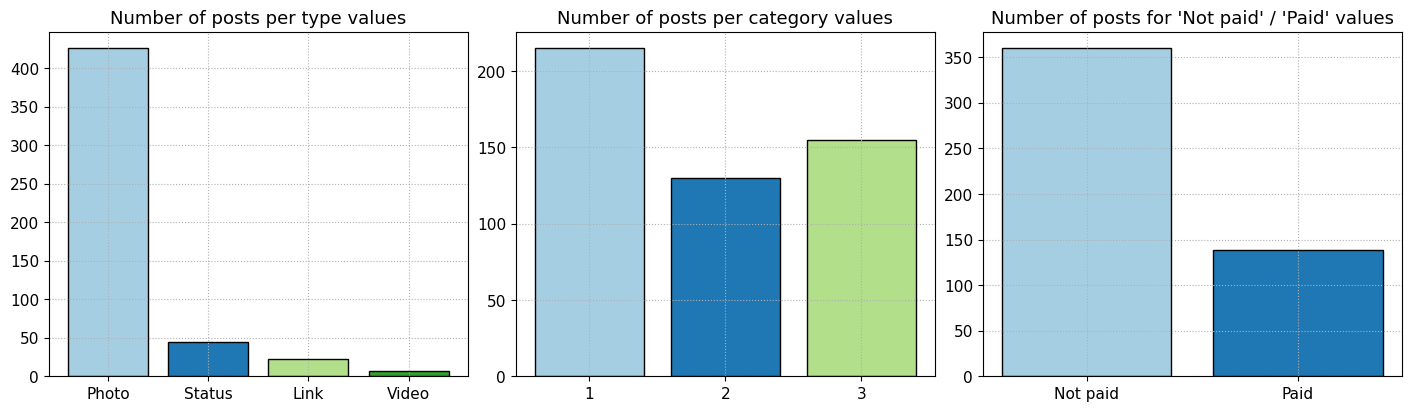

In [95]:
type_data = fb_df.Type.value_counts(sort=False, dropna=False)
category_data = fb_df.Category.value_counts(sort=False, dropna=False).sort_index()
paid_data = fb_df.Paid.value_counts(sort=False, dropna=True).sort_index()
df_list = [type_data, category_data, paid_data]
labels_list = [type_data.index, category_data.index, ['Not paid', 'Paid']]
titles_list = ['Number of posts per type values',
               'Number of posts per category values',
               '''Number of posts for 'Not paid' / 'Paid' values''']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), layout='constrained')
for ax, df, lb, tt in zip(axes.flat, df_list, labels_list, titles_list):
    ax.bar(x=df.index, height=df.values, color=plt.cm.Paired.colors, edgecolor='k')
    ax.set_xticks(ticks=df.index, labels=lb, fontsize=11)
    ax.set_title(tt, fontsize=13)
    ax.grid(linestyle=':')
    ax.yaxis.set_tick_params(labelsize=11)
fig.savefig('plots/number_posts_per_category.png', dpi=288, bbox_inches='tight');

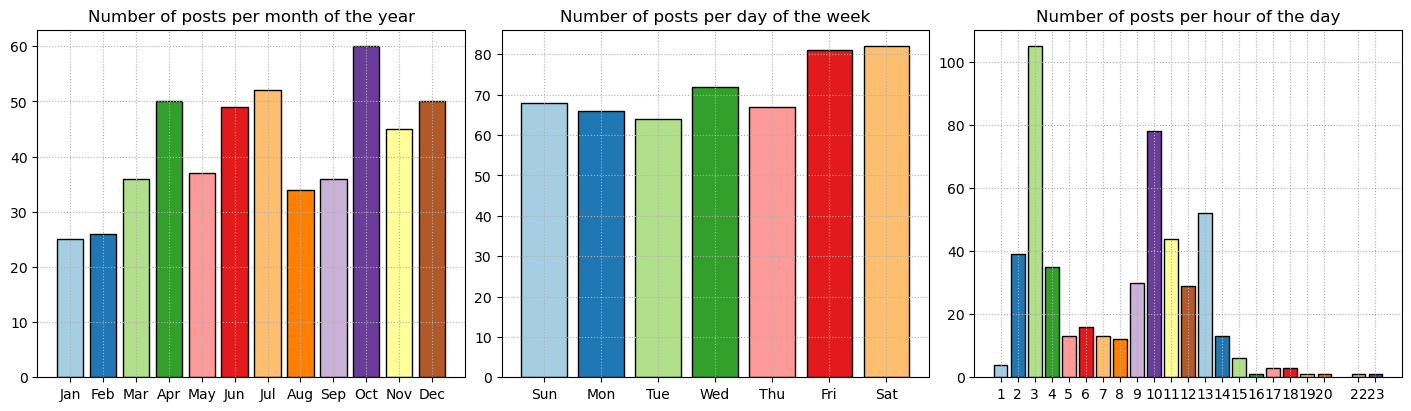

In [96]:
# data for first plot
month_data = fb_df['Post Month'].value_counts(sort=False)
sorted_index_m = [int(x) for x in list(month_data.index)]
month_data_new = pd.concat([pd.Series(sorted_index_m), pd.Series(month_data.values)], axis=1)
month_data_new.rename(columns={0: 'Index', 1:'Frequency'}, inplace=True)
month_data_new.sort_values(by='Index', inplace=True)
# data for second plot
day_data = fb_df[['Post Weekday']].value_counts(sort=False).sort_index().reset_index()
day_data.rename(columns={'Post Weekday': 'Index', 0:'Frequency'}, inplace=True)
# data for third plot
hour_data = fb_df['Post Hour'].value_counts(sort=False)
sorted_index_h = [int(x) for x in list(hour_data.index)]
hour_data_new  = pd.concat([pd.Series(sorted_index_h), pd.Series(hour_data.values)], axis=1)
hour_data_new.rename(columns={0: 'Index', 1:'Frequency'}, inplace=True)
hour_data_new.sort_values(by='Index', inplace=True)

df_list = [month_data_new, day_data, hour_data_new]
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
labels_list = [months, days, hour_data_new.Index]
titles_list = ['Number of posts per month of the year',
               'Number of posts per day of the week',
               'Number of posts per hour of the day',
               ]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), layout='constrained')
for ax, df, lb, tt in zip(axes.flat, df_list, labels_list, titles_list):
        ax.bar(x=df.Index, height=df.Frequency, color=plt.cm.Paired.colors, edgecolor='k')
        ax.set_xticks(ticks=df.Index, labels=lb, fontsize=10)
        ax.set_title(tt, fontsize=12)
        ax.yaxis.set_tick_params(labelsize=10)
        ax.grid(linestyle=':')
fig.savefig('plots/number_posts_per_time_interval.png', dpi=288, bbox_inches='tight');

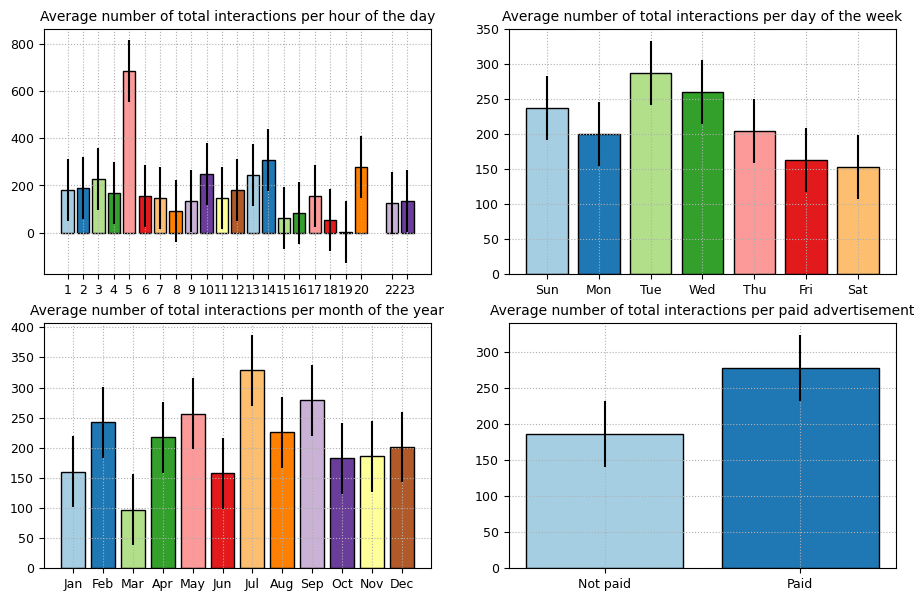

In [97]:
# code for first plot
tot_int_ph = fb_df['Total Interactions'].groupby(fb_df['Post Hour']).mean()
sorted_index = [int(x) for x in list(tot_int_ph.index)]
tot_int_ph_new = pd.concat([pd.Series(sorted_index), pd.Series(tot_int_ph.values)], axis=1)
tot_int_ph_new.rename(columns={0: 'Index', 1: 'Frequency'}, inplace=True)
tot_int_ph_new.sort_values(by='Index', inplace=True)
# code for second plot
tot_int_pw_new = fb_df['Total Interactions'].groupby(fb_df['Post Weekday']).mean().reset_index()
tot_int_pw_new.rename(columns={'Post Weekday': 'Index', 'Total Interactions': 'Frequency'},
                               inplace=True)
tot_int_pw_new.sort_values(by='Index', inplace=True)
# code for third plot
tot_int_pm = fb_df['Total Interactions'].groupby(fb_df['Post Month']).mean()
sorted_index = [str(x).zfill(2) for x in list(tot_int_pm.index)]
tot_int_pm_new = pd.concat([pd.Series(sorted_index), pd.Series(tot_int_pm.values)], axis=1)
tot_int_pm_new.rename(columns={0: 'Index', 1: 'Frequency'}, inplace=True)
tot_int_pm_new.sort_values(by='Index', inplace=True)
# code for fourth plot
tot_int_p_new = fb_df['Total Interactions'].groupby(fb_df['Paid']).mean().reset_index()
tot_int_p_new.rename(columns={'Paid': 'Index', 'Total Interactions': 'Frequency'}, inplace=True)
tot_int_p_new.sort_values(by='Index', inplace=True)

# dataframes
df_list = [tot_int_ph_new, tot_int_pw_new, tot_int_pm_new, tot_int_p_new]
# labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
paid_or_not = ['Not paid', 'Paid']
labels_list = [tot_int_ph_new.Index, days, months, paid_or_not]
# titles
titles_list = ['Average number of total interactions per hour of the day',
               'Average number of total interactions per day of the week',
               'Average number of total interactions per month of the year',
               'Average number of total interactions per paid advertisement',
               ]

# plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
for ax, df, lb, tt in zip(axes.flat, df_list, labels_list, titles_list):
    ax.bar(x=df.Index, height=df.Frequency, color=plt.cm.Paired.colors,
           edgecolor='k', yerr=np.std(df.Frequency.values))
    ax.set_title(tt, fontsize=10)
    ax.set_xticks(ticks=df.Index, labels=lb, fontsize=9)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.grid(linestyle=':')
fig.savefig('plots/average_number_of_total_interactions.png', dpi=288, bbox_inches='tight');


In [98]:
numerical_cols = ['Page total likes', 'Lifetime Post Total Reach',
                  'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
                  'Lifetime Post Consumers', 'Lifetime Post Consumptions',
                  'Lifetime Post Impressions by people who have liked your Page',
                  'Lifetime Post reach by people who like your Page',
                  'Lifetime People who have liked your Page and engaged with your post',
                  'comment', 'like', 'share', 'Total Interactions',]

In [99]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
fb_perf_df = fb_df[numerical_cols]
fb_std = scalar.fit_transform(fb_perf_df)
fb_std_df = pd.DataFrame(fb_std, columns=numerical_cols)

In [100]:
fb_std_df.head()

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0.999403,-0.490859,-0.319251,-0.754391,-0.782390,-0.628507,-0.229166,-0.644420,-0.802117,-0.164558,-0.306263,-0.241157,-0.295167
1,0.999403,-0.151569,-0.137227,0.545365,0.637720,0.129526,-0.084652,-0.061698,0.813599,-0.117298,-0.148405,0.040730,-0.126681
2,0.999403,-0.505781,-0.328608,-0.755407,-0.777853,-0.631009,-0.233620,-0.662272,-0.780879,-0.353596,-0.346502,-0.311629,-0.347819
3,0.999403,1.594532,0.761212,1.311601,-0.009950,-0.148169,0.740997,3.317884,1.267764,2.387461,4.314961,2.812614,4.119702
4,0.999403,-0.293131,-0.208428,-0.253390,-0.440974,-0.417859,-0.176430,-0.441145,-0.349586,0.544336,0.455171,0.510541,0.476185


In [101]:
fb_std_df.describe().applymap('{:.2f}'.format)

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.57,-0.60,-0.38,-0.93,-0.90,-0.70,-0.27,-0.83,-0.98,-0.35,-0.55,-0.64,-0.56
25%,-0.65,-0.47,-0.31,-0.54,-0.53,-0.45,-0.21,-0.57,-0.52,-0.31,-0.38,-0.41,-0.37
50%,0.39,-0.38,-0.27,-0.30,-0.28,-0.28,-0.18,-0.41,-0.32,-0.21,-0.24,-0.19,-0.23
75%,0.81,-0.03,-0.10,0.14,0.18,0.02,-0.03,0.18,0.08,-0.02,0.03,0.12,0.04
max,1.00,7.33,14.09,10.70,11.94,9.19,18.27,5.85,6.15,17.23,15.46,17.92,16.12


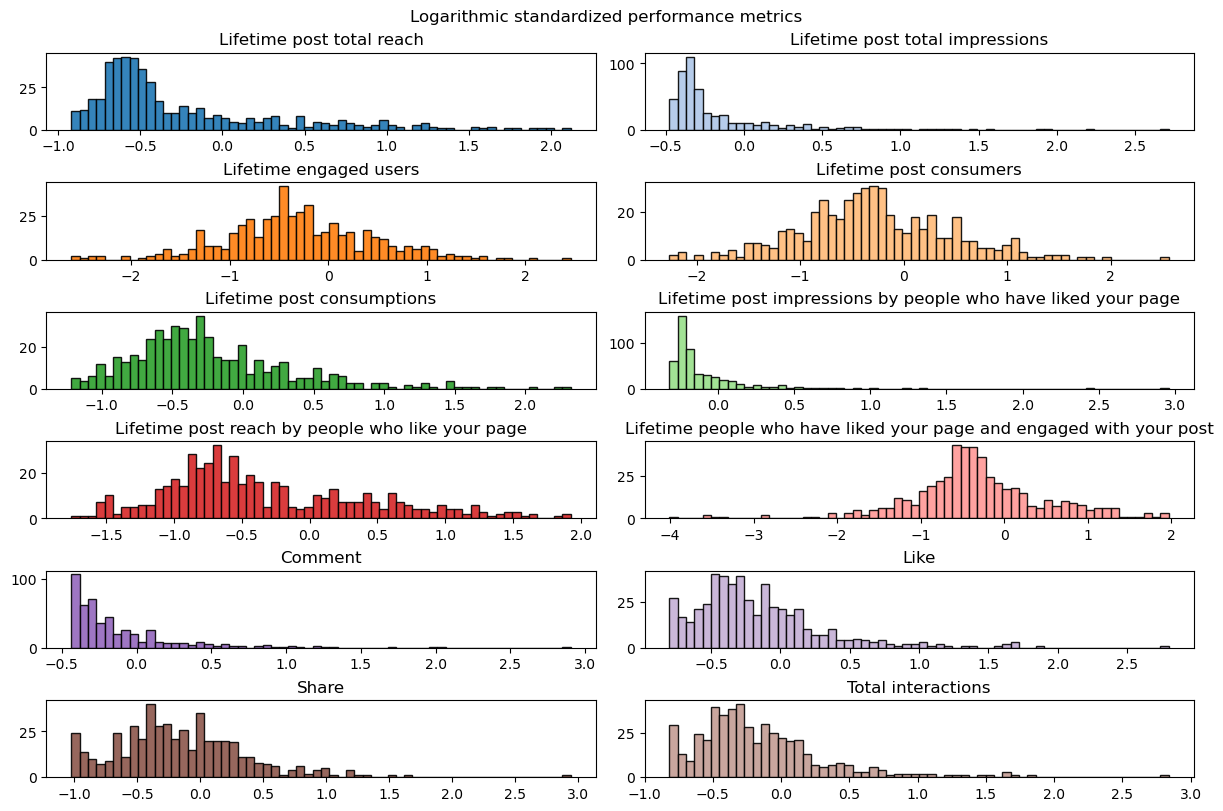

In [102]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 8), layout='constrained')
# using 'tab20' colormap
cmap = plt.cm.tab20.colors
for ax, clm, col in zip(axes.flat, numerical_cols[1:], cmap):
    ax.hist(np.log(fb_std_df.loc[:, clm]+1), edgecolor='k', alpha=0.9, color=col, bins=60,)
    ax.set_title(clm.capitalize())
plt.suptitle("Logarithmic standardized performance metrics")
plt.savefig('plots/performance_metrics_log_hist.png', dpi=288, bbox_inches='tight');